In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)
plt.rcParams.update({'font.size': 22})

In [4]:
df = pd.read_csv("C:/Users/vidis/OneDrive/Desktop/Spring23/BachelorProject/complete_dataset.csv")
df = df.set_index(pd.to_datetime(df['Time'])).drop(['Time'],axis=1)

# create seasonal indices
df.insert(0, "Month", value = np.array(df.index.month))
df.insert(0, "Hour", value = np.array(df.index.hour))
df.insert(0, "Day", value = np.array(df.index.dayofweek))

# production dataset with relevant indices
pf = df[['Month', 'Hour', 'prod_k28','prod_h16','prod_h22','prod_h28', 'prod_h32']]

# consumption dataset with relevant indices
cf = df[['Month', 'Hour', 'Day', 'cons_k28','cons_h16','cons_h22','cons_h28', 'cons_h32']]

## Create mean values w.r.t seasonal indices to fill null rows

In [37]:
pf_means = pf.groupby(['Month','Hour'], as_index=False).mean()
cf_means = cf.groupby(['Month','Day', 'Hour'], as_index=False).mean()

In [38]:
cf_means.shape

(2016, 8)

In [39]:
12*24*7

2016

In [40]:
cf_means.columns = ['Month', 'Day', 'Hour', 'cons_k28_m', 'cons_h16_m', 'cons_h22_m', 'cons_h28_m', 'cons_h32_m']
cf_means = cf_means.round(1)

In [41]:
pf_means.columns = ['Month','Hour','prod_k28_m','prod_h16_m','prod_h22_m','prod_h28_m','prod_h32_m']
pf_means = pf_means.round(1)

In [42]:
merged = pf.reset_index().merge(pf_means.reset_index(), on=['Month','Hour'])
merged['Time'] = pd.to_datetime(merged['Time'], format='%Y-%m-%d %H:%M:%S')
merged = merged.sort_values('Time').reset_index()

In [43]:
merged.isnull().sum()

level_0         0
Time            0
Month           0
Hour            0
prod_k28      142
prod_h16      479
prod_h22      223
prod_h28      187
prod_h32      184
index           0
prod_k28_m      0
prod_h16_m      0
prod_h22_m      0
prod_h28_m      0
prod_h32_m      0
dtype: int64

In [44]:
lst = ['prod_k28','prod_h16','prod_h22','prod_h28', 'prod_h32']
print
for i in lst:
    means = str(i+'_m')
    merged[i] = merged[i].fillna(merged[means])

merged.isnull().sum()

level_0       0
Time          0
Month         0
Hour          0
prod_k28      0
prod_h16      0
prod_h22      0
prod_h28      0
prod_h32      0
index         0
prod_k28_m    0
prod_h16_m    0
prod_h22_m    0
prod_h28_m    0
prod_h32_m    0
dtype: int64

In [45]:
lst.append('Time')

In [46]:
pf_filled = merged[lst]
pf_filled = pf_filled.set_index(pd.to_datetime(pf_filled['Time']))
pf_filled = pf_filled.drop(['Time'], axis=1)
lst.remove('Time')

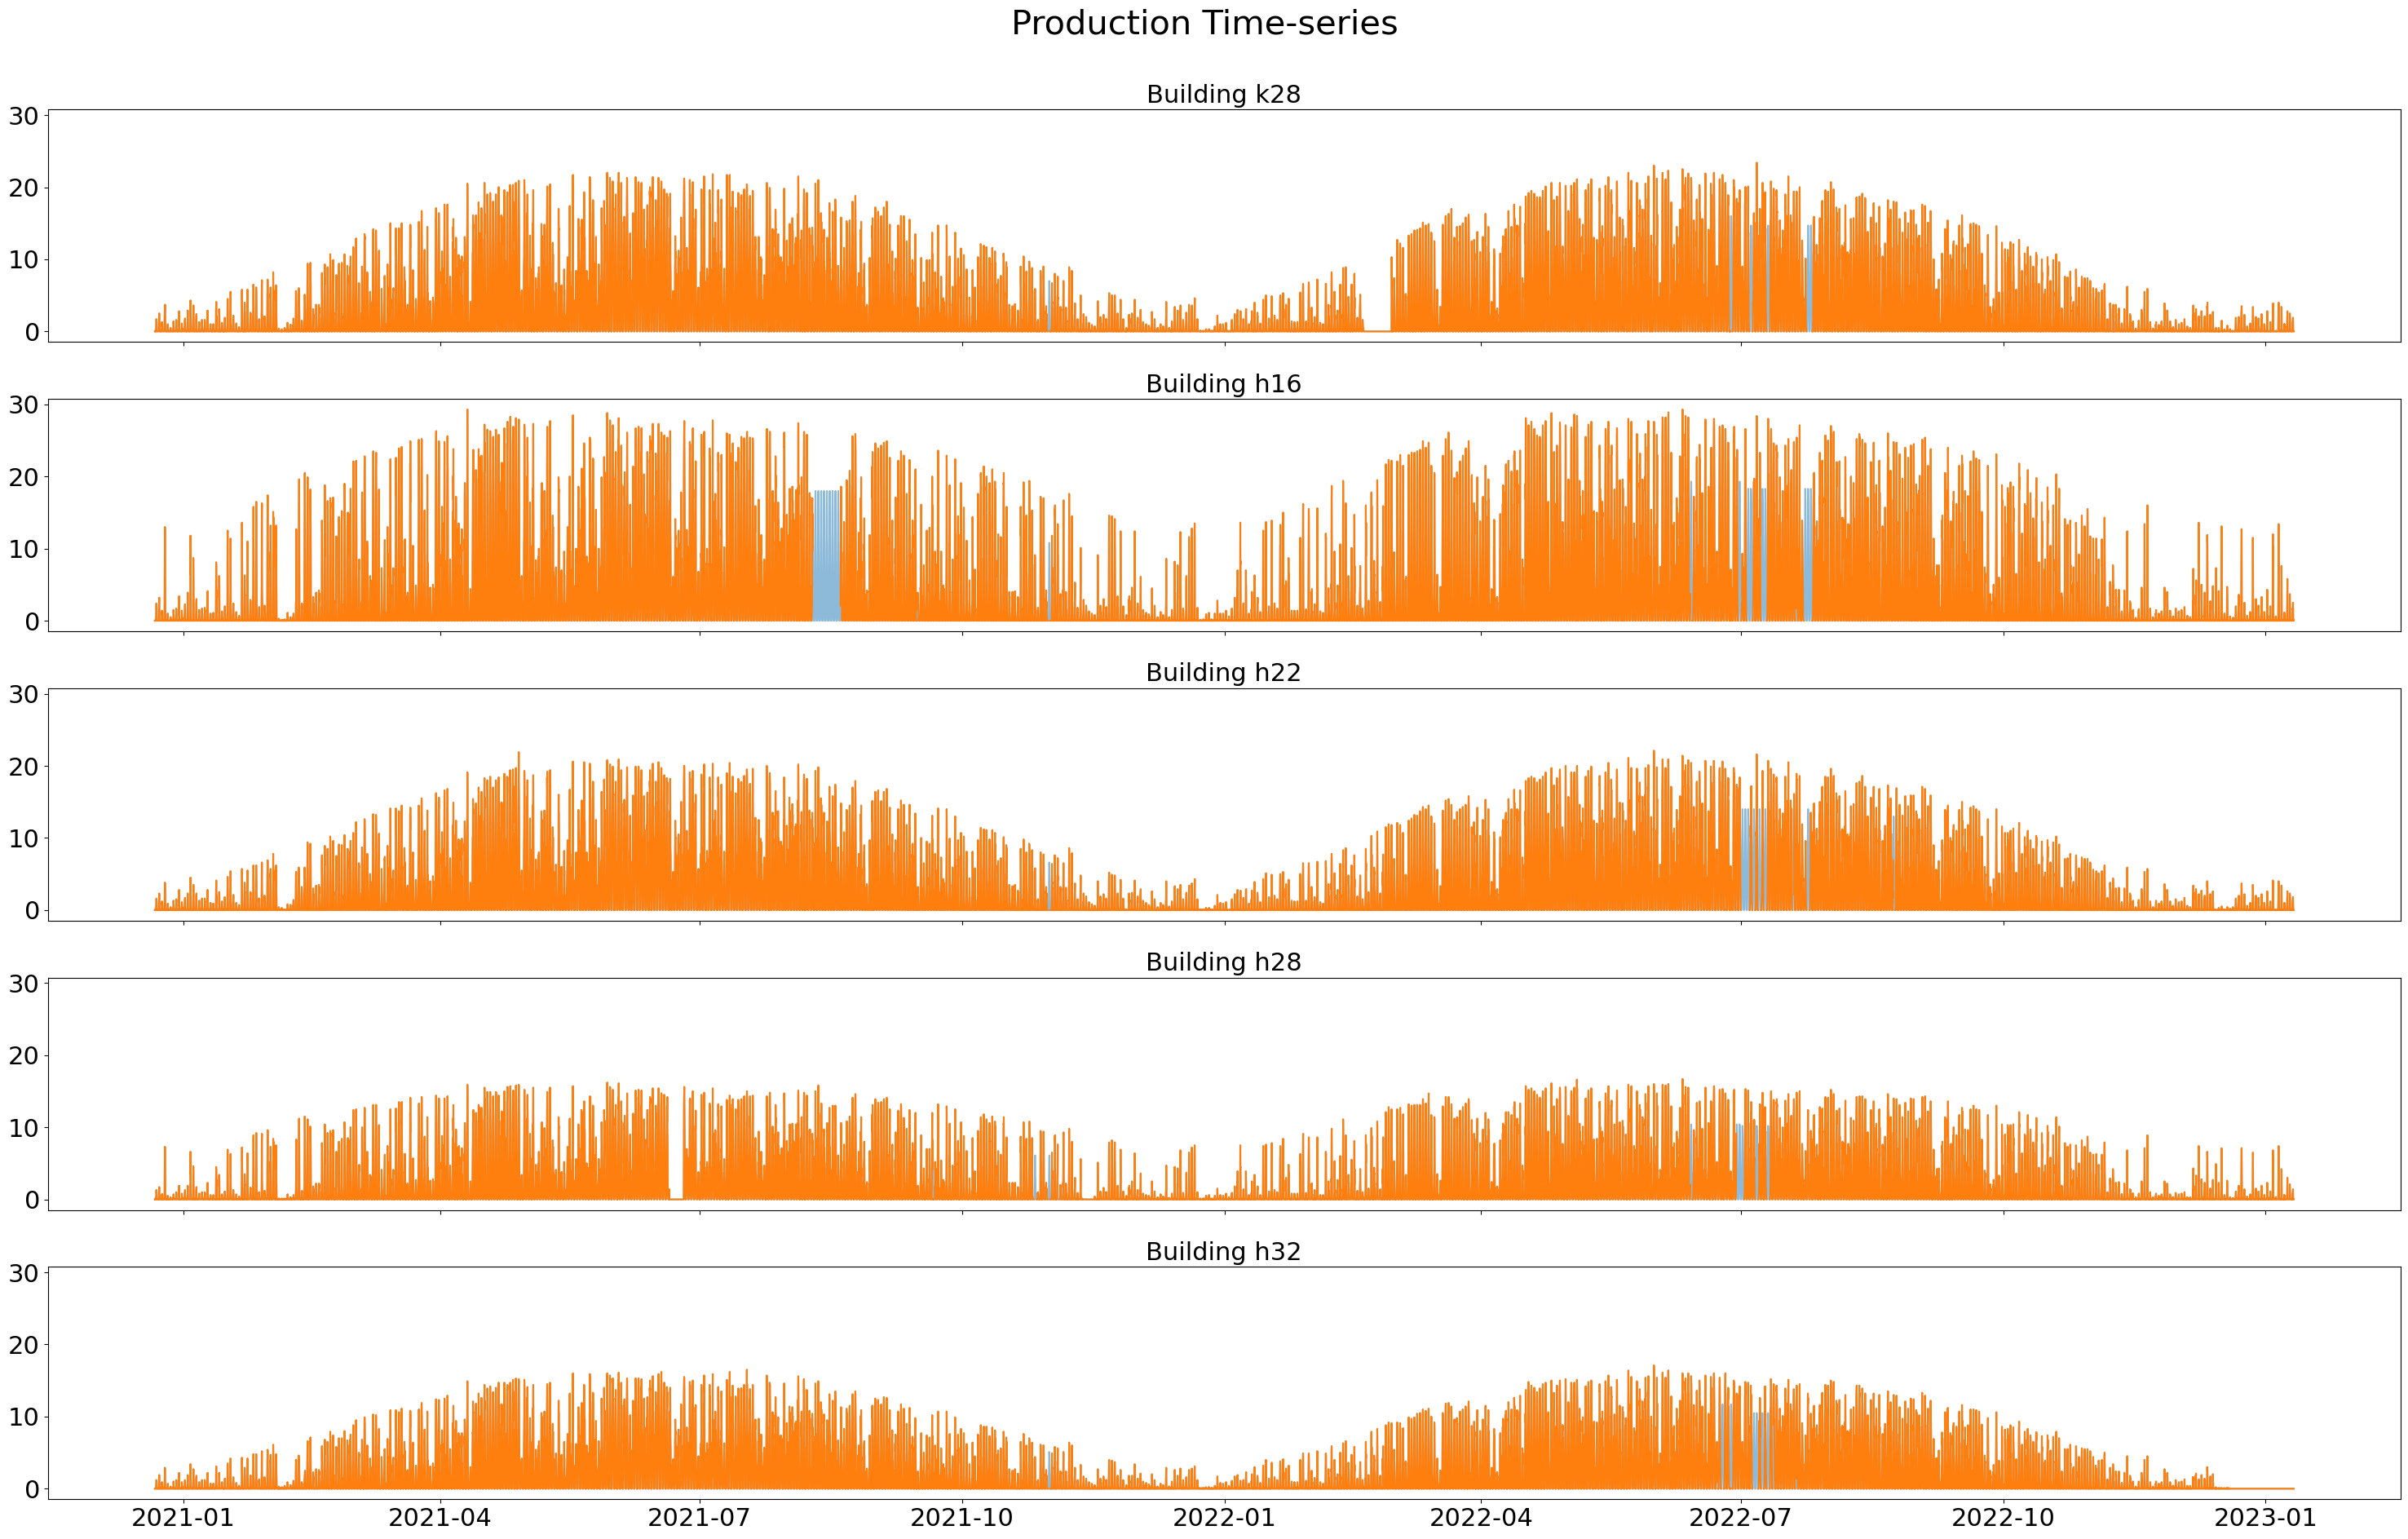

In [47]:
fig, axs = plt.subplots(nrows = 5, ncols=1,figsize=(30,20),sharex=True, sharey=True)

for i, x in enumerate(lst):
    axs[i].plot(pf_filled[x], alpha=0.5)
    axs[i].plot(pf[x])
    string = 'Building '+x.split('_')[1]
    axs[i].set_title(string,fontsize=22)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('Production Time-series',fontsize=30)
plt.savefig("prod_filled.png")
plt.show()
plt.clf()
plt.close()

In [21]:
merged = cf.reset_index().merge(cf_means.reset_index(), on=['Month','Hour','Day'])
merged['Time'] = pd.to_datetime(merged['Time'], format='%Y-%m-%d %H:%M:%S')
merged = merged.sort_values('Time').reset_index()

In [22]:
merged.isnull().sum()

level_0         0
Time            0
Month           0
Hour            0
Day             0
cons_k28      142
cons_h16      754
cons_h22      223
cons_h28      187
cons_h32      184
index           0
cons_k28_m      0
cons_h16_m      0
cons_h22_m      0
cons_h28_m      0
cons_h32_m      0
dtype: int64

In [23]:
lst = ['cons_k28','cons_h16','cons_h22','cons_h28', 'cons_h32']
print
for i in lst:
    means = str(i+'_m')
    merged[i] = merged[i].fillna(merged[means])

merged.isnull().sum()

level_0       0
Time          0
Month         0
Hour          0
Day           0
cons_k28      0
cons_h16      0
cons_h22      0
cons_h28      0
cons_h32      0
index         0
cons_k28_m    0
cons_h16_m    0
cons_h22_m    0
cons_h28_m    0
cons_h32_m    0
dtype: int64

In [24]:
lst.append('Time')
cf_filled = merged[lst]
cf_filled = cf_filled.set_index(pd.to_datetime(cf_filled['Time']))
cf_filled = cf_filled.drop(['Time'], axis=1)
lst.remove('Time')

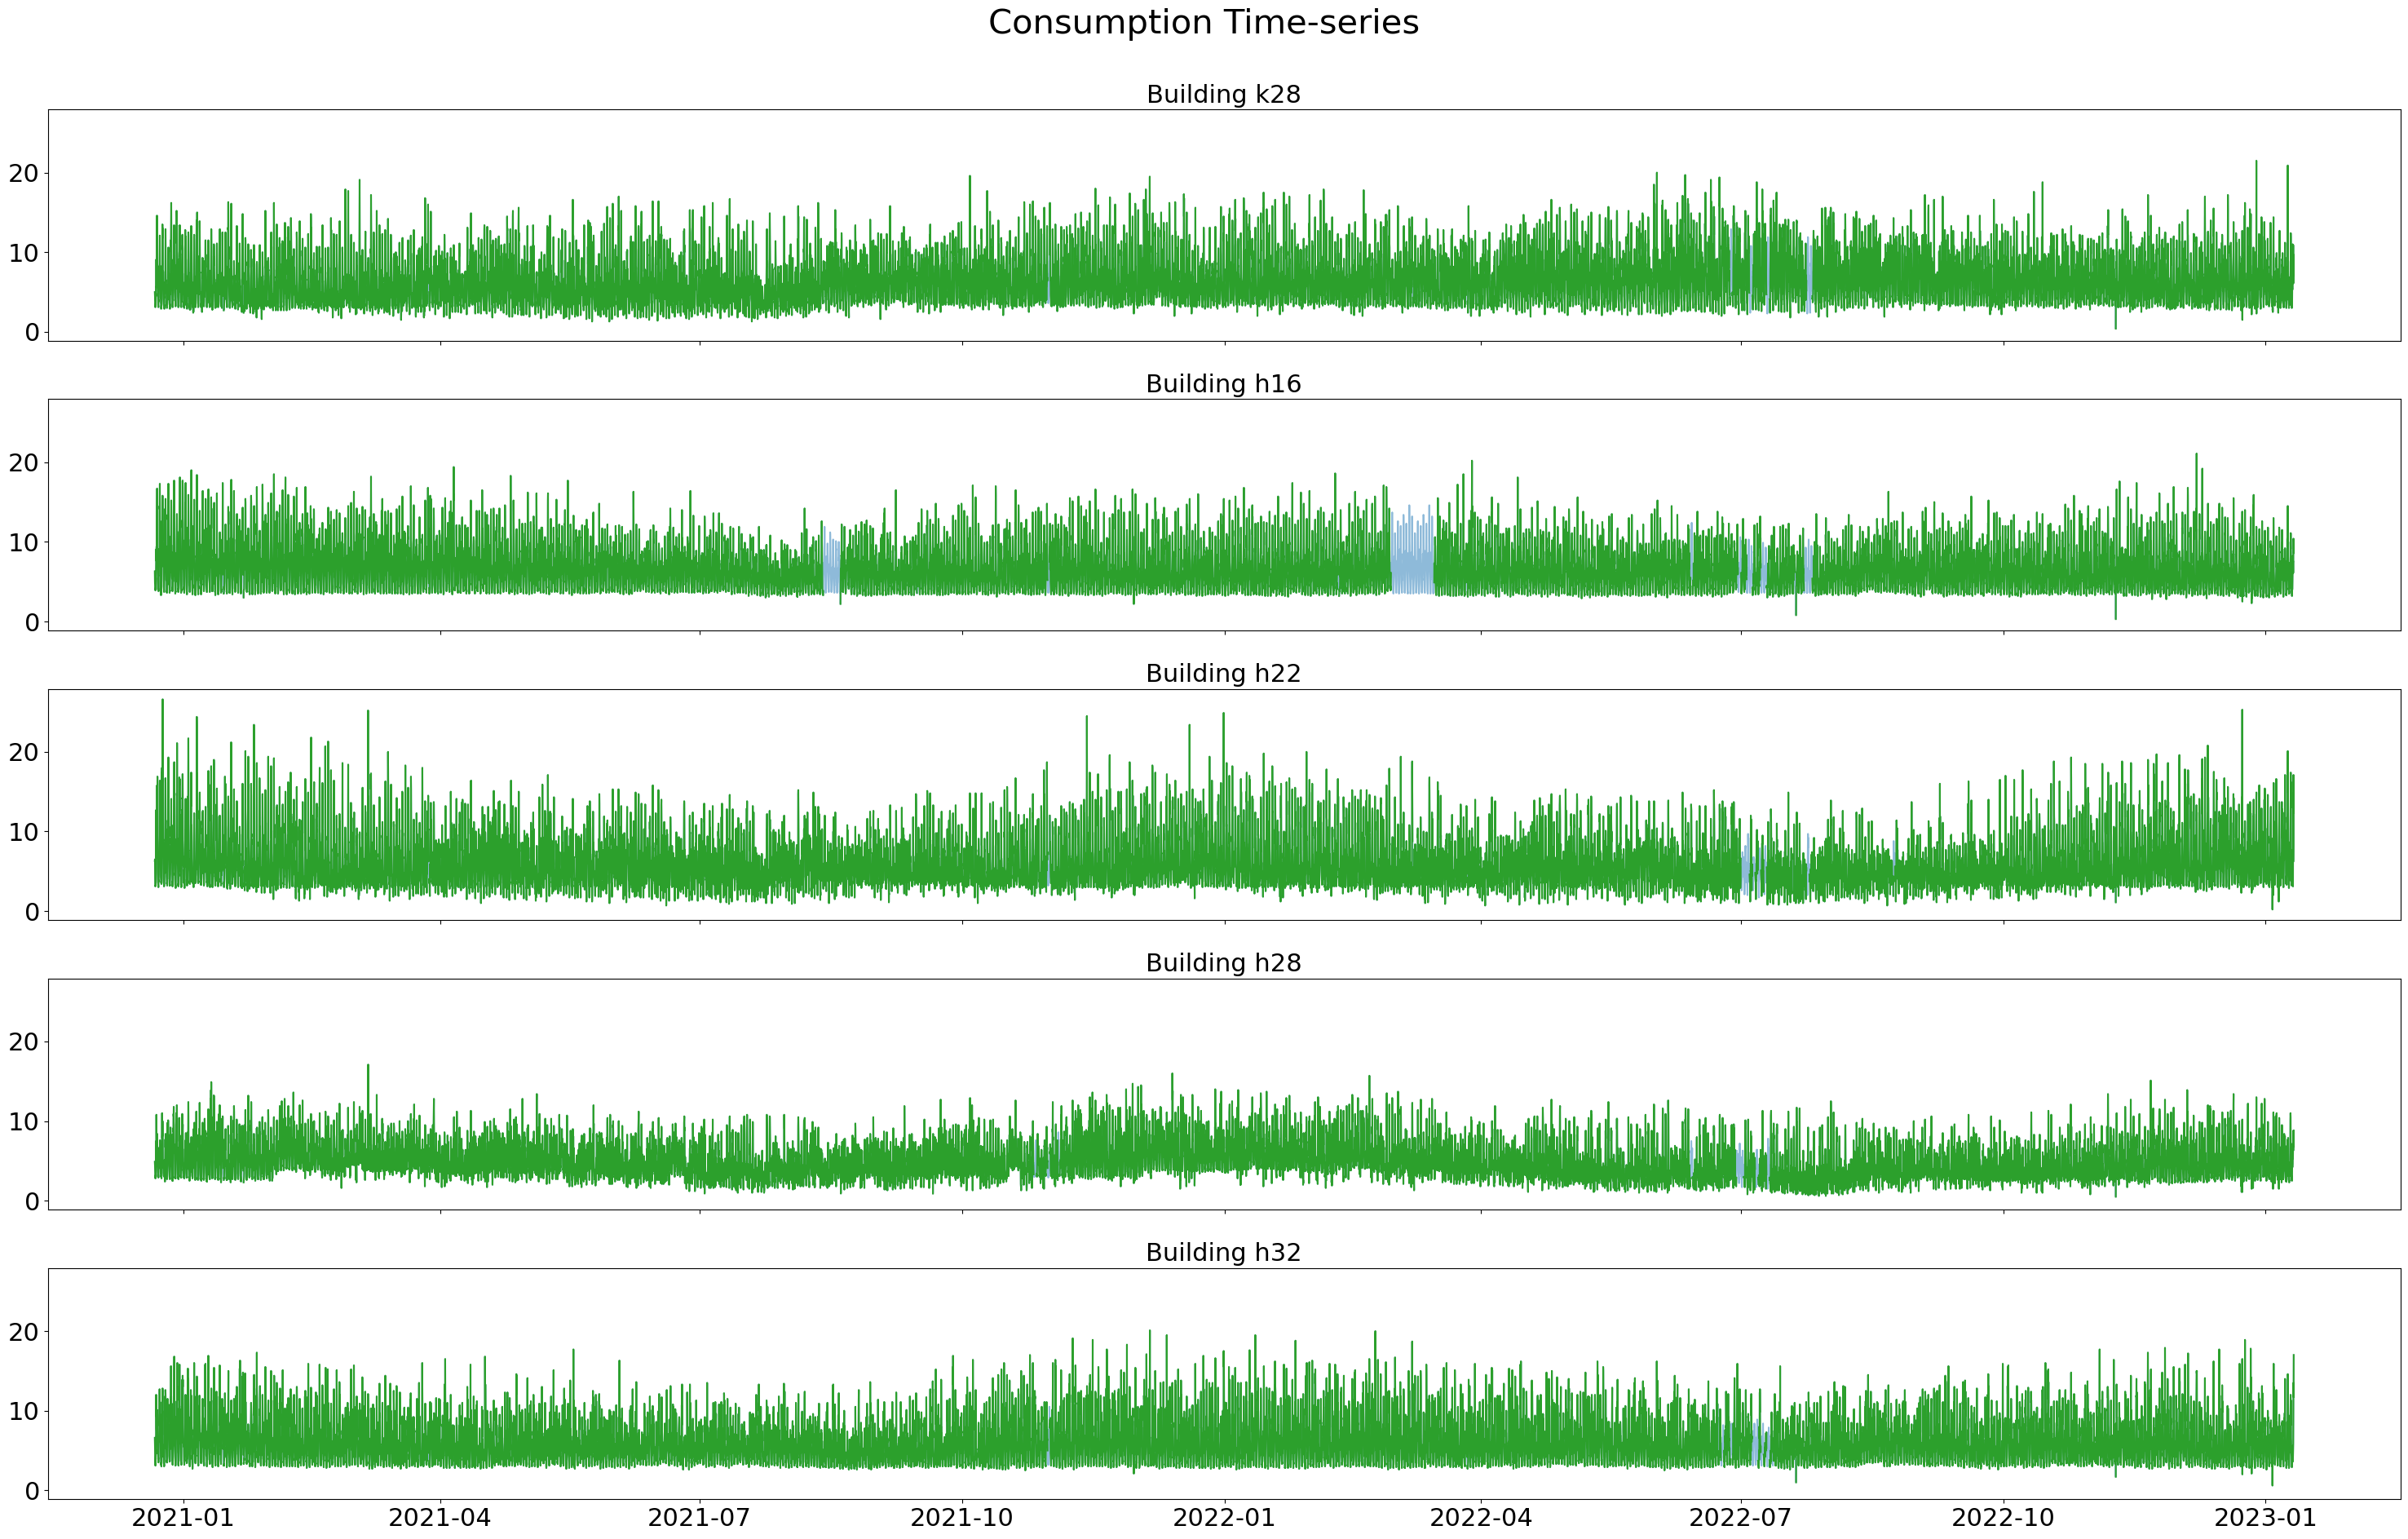

In [34]:
fig, axs = plt.subplots(nrows = 5, ncols=1,figsize=(30,20),sharex=True, sharey=True)

for i, x in enumerate(lst):
    axs[i].plot(cf_filled[x], alpha=0.5, color='tab:blue')
    axs[i].plot(cf[x], color='tab:green')
    string = 'Building '+x.split('_')[1]
    axs[i].set_title(string,fontsize=22)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('Consumption Time-series',fontsize=30)
plt.savefig("cons_filled.png")
plt.show()
plt.clf()
plt.close()

## Save files

In [17]:
pf_filled.to_csv('pf_filled.csv')

In [18]:
cf_filled.to_csv('cf_filled.csv')

In [49]:
pf_filled.shape

(17997, 5)

In [54]:
pf_filled.reset_index().merge(cf_filled.reset_index(),on='Time').set_index('Time')

,prod_k28,prod_h16,prod_h22,prod_h28,prod_h32,cons_k28,cons_h16,cons_h22,cons_h28,cons_h32
Time,,,,,,,,,,
2020-12-22 00:00:00,0.0,0.0,0.0,0.0,0.0,5.0,6.3,6.3,4.9,6.6
2020-12-22 01:00:00,0.0,0.0,0.0,0.0,0.0,4.3,4.8,6.5,4.4,5.4
2020-12-22 02:00:00,0.0,0.0,0.1,0.1,0.0,4.0,4.8,4.3,3.9,4.4
2020-12-22 03:00:00,0.0,0.0,0.0,0.0,0.0,3.8,4.3,3.3,3.2,3.7
2020-12-22 04:00:00,0.0,0.0,0.0,0.0,0.0,3.1,4.0,3.1,3.1,3.4
...,...,...,...,...,...,...,...,...,...,...
2023-01-10 16:00:00,0.3,0.3,0.3,0.2,0.0,10.9,6.1,6.2,6.3,5.9
2023-01-10 17:00:00,0.0,0.0,0.0,0.0,0.0,6.1,8.3,8.4,6.8,9.6
2023-01-10 18:00:00,0.0,0.0,0.0,0.0,0.0,9.7,10.4,17.1,8.8,13.5


In [52]:
cf_filled

,cons_k28,cons_h16,cons_h22,cons_h28,cons_h32
Time,,,,,
2020-12-22 00:00:00,5.0,6.3,6.3,4.9,6.6
2020-12-22 01:00:00,4.3,4.8,6.5,4.4,5.4
2020-12-22 02:00:00,4.0,4.8,4.3,3.9,4.4
2020-12-22 03:00:00,3.8,4.3,3.3,3.2,3.7
2020-12-22 04:00:00,3.1,4.0,3.1,3.1,3.4
...,...,...,...,...,...
2023-01-10 16:00:00,10.9,6.1,6.2,6.3,5.9
2023-01-10 17:00:00,6.1,8.3,8.4,6.8,9.6
2023-01-10 18:00:00,9.7,10.4,17.1,8.8,13.5
